# Random Forest Regressor


In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt

In [2]:
# Load CS data & reshape to quarterly 
CS = pd.read_csv('CS.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
CS = CS.resample('Q').last()
CS = CS.iloc[:-1]
CS.shape

(137, 1)

In [3]:
# Load features in DF
feat = pd.read_csv('features.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
feat = feat.loc[CS.index[0]:CS.index[-1]]
feat.shape

(137, 9)

In [4]:
# Define features set
X = feat.diff().dropna()
X.head()

,Homeownership Rate in the United States,Monthly Supply of Houses in the United States,US Population data,Median Sales Price of Houses Sold,GDP,Natural Rate of Unemployment,Consumer Price Index,House Price Index,10-Year Treasury
1987-06-30,0.0,0.466667,510.666667,5500.0,84.004,-0.014400,1.400000,2.21,0.048436
1987-09-30,0.4,0.233333,600.333333,2600.0,78.395,-0.015224,1.100000,1.65,0.136989
1987-12-31,-0.1,0.366667,600.333333,5500.0,123.439,-0.016047,1.366667,0.97,0.109345
1988-03-31,-0.4,-0.233333,487.000000,-1500.0,65.378,-0.016840,1.166667,2.28,-0.079677
1988-06-30,0.0,-0.500000,509.000000,0.0,116.664,-0.017575,1.466667,3.00,-0.023799


In [55]:
# Define target vector 
y = CS.pct_change().dropna().values.reshape(-1, 1)
y[:5]


array([[0.02714357],
       [0.02117121],
       [0.0106619 ],
       [0.01432438],
       [0.02512838]])

In [56]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)


In [59]:
# Create the StandardScaler instance
# Fit the Standard Scaler with the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# y_train_scaled = scaler.fit_transform(y_train)
# y_test_scaled = scaler.fit_transform(y_test)

In [60]:
# Create the random forest Regressor instance
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=5, random_state=42)


In [61]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

<ipython-input-61-d791301b4f91>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [62]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [63]:
# Get the feature importance array
rf_model.feature_importances_

array([0.03717465, 0.05724206, 0.09878208, 0.05620677, 0.11569594,
       0.28869857, 0.04127662, 0.2390515 , 0.06587181])

<AxesSubplot:>

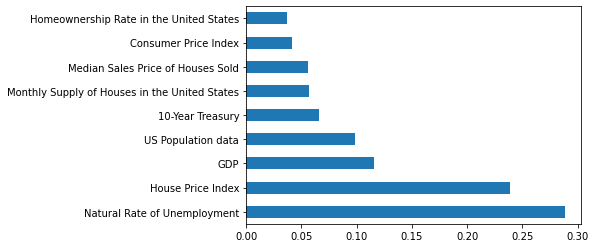

In [64]:
feat_importances = pd.Series(rf_model.feature_importances_, index=feat.columns)
feat_importances.nlargest(9).plot(kind='barh')

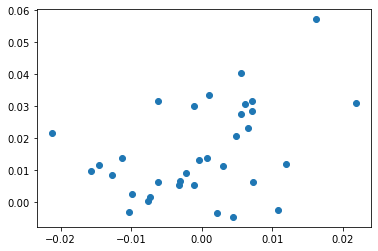

In [66]:
plt.scatter(predictions, y_test)

### "It's pretty much perfect" - Liam circa 2021 "It'll probably be a profitable model"

In [68]:
from sklearn.metrics import r2_score

In [69]:
r2_score(y_test,predictions)

-1.1306168418475018

In [31]:
sum((y_test-predictions)**2)/sum((y_test-(y_test).mean())**2

array([2.11233859, 1.12516523, 1.01087477, 1.41971321, 1.07612161,
       1.07916608, 1.00024286, 1.3752941 , 2.01468695, 5.23596468,
       3.56181777, 2.95370198, 3.73296704, 4.83212813, 1.4567763 ,
       1.29047965, 4.25013086, 4.93045811, 1.02445552, 2.07872591,
       3.22102415, 4.59854294, 1.05971637, 3.11685878, 3.9477891 ,
       2.91779092, 1.18278933, 3.34103051, 3.84109922, 2.84082236,
       8.53553878, 1.12053729, 1.11565085, 1.09544529])